<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/VILCA_CALCINA_EMERSON_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
#Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Cargar archivos .txt separados por comas
df1 = pd.read_csv('index_1.csv', sep=',')
df2 = pd.read_csv('index_2.csv', sep=',')

# Unirlos en un solo DataFrame
df = pd.concat([df1, df2], ignore_index=True)

# Mostrar resumen inicial
print("Dataset combinado:")
print(df.head())
print("\nColumnas:", df.columns.tolist())


Dataset combinado:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Columnas: ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']


In [13]:
#Convertir columna datetime a tipo fecha
df = df.copy()
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df = df.dropna(subset=['datetime'])  # eliminar filas no convertidas


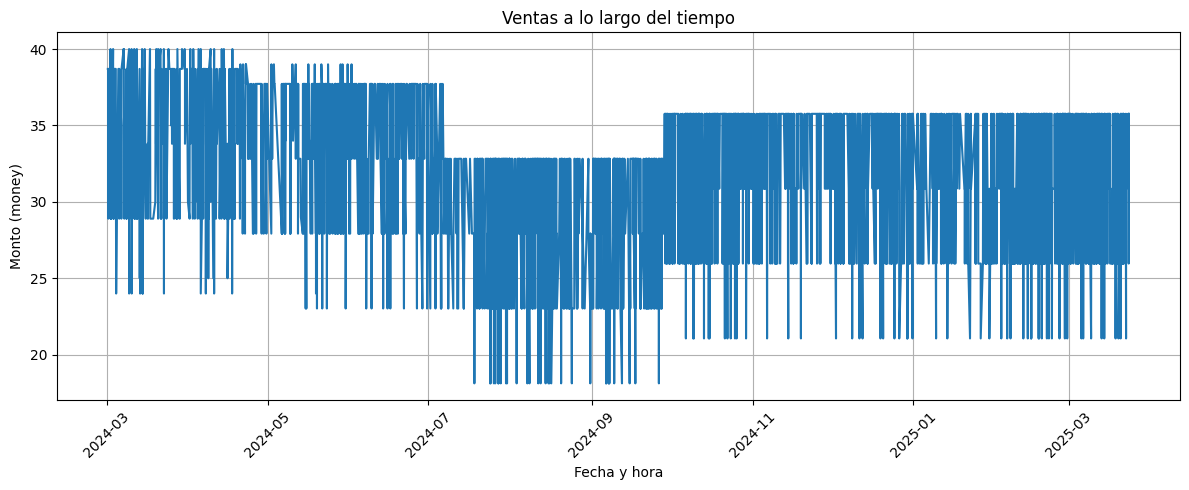

In [14]:
#Ventas a lo largo del tiempo
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='datetime', y='money')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Monto (money)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


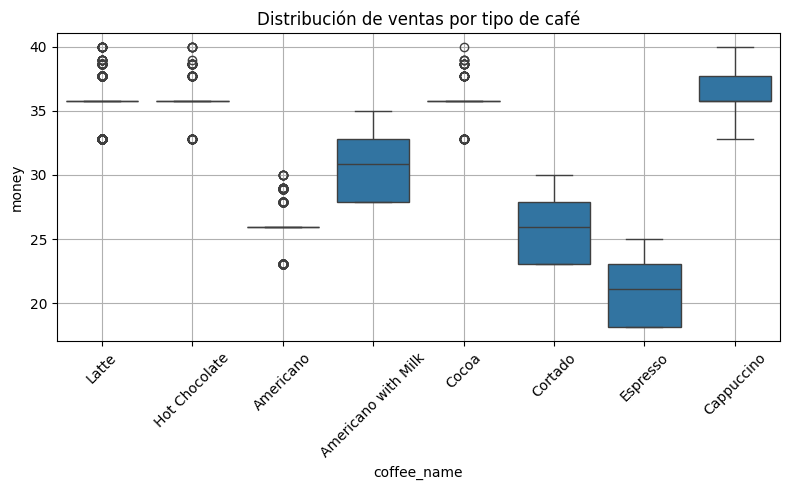

In [15]:
#Ventas por tipo de café
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='coffee_name', y='money')
plt.title('Distribución de ventas por tipo de café')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


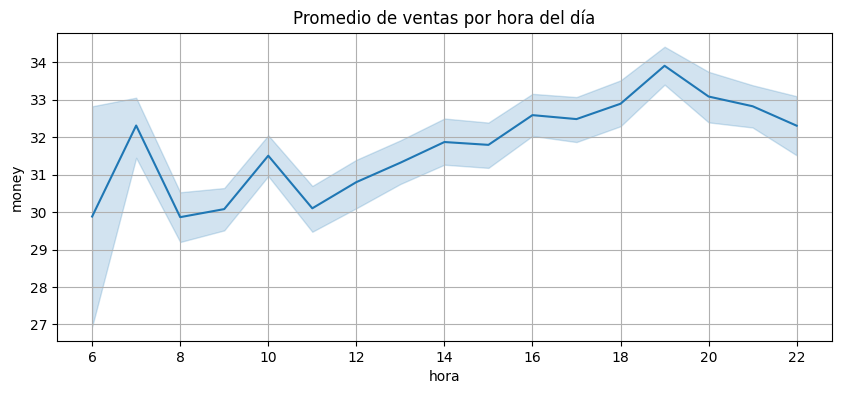

In [16]:
#Agregar columnas temporales para análisis por hora y día
df['hora'] = df['datetime'].dt.hour
df['dia_semana'] = df['datetime'].dt.dayofweek  # 0 = lunes

# Promedio de ventas por hora del día
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='hora', y='money', estimator='mean')
plt.title('Promedio de ventas por hora del día')
plt.grid(True)
plt.show()


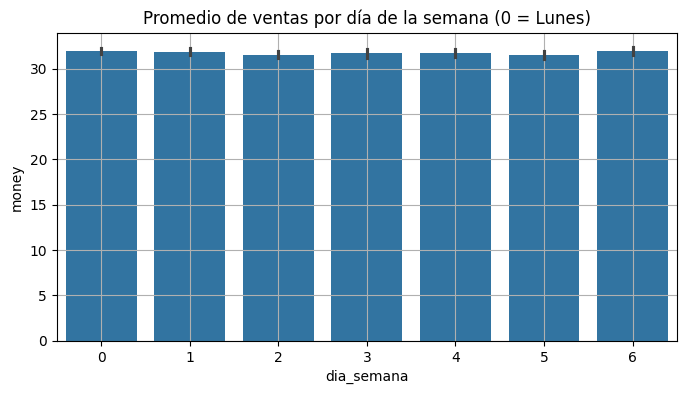

In [17]:
#Promedio de ventas por día de la semana
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='dia_semana', y='money', estimator='mean')
plt.title('Promedio de ventas por día de la semana (0 = Lunes)')
plt.grid(True)
plt.show()


In [31]:
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.dayofweek  # 0 = lunes
df['hora'] = df['datetime'].dt.hour
df['fecha'] = df['datetime'].dt.date  # para agrupar por día


In [33]:
# Agrupar ventas por fecha
ventas_dia = df.groupby('fecha')['money'].sum().reset_index()
ventas_dia.columns = ['fecha', 'cantidad_total_vendida_no_dia']

# Unir con el dataframe original
df = df.merge(ventas_dia, on='fecha')


In [34]:
df_encoded = pd.get_dummies(df, columns=['coffee_name'], drop_first=True)


In [35]:
# X = variables de entrada, y = lo que queremos predecir
X = df_encoded.drop(columns=['datetime', 'fecha', 'money', 'cantidad_total_vendida_no_dia'])
y = df_encoded['cantidad_total_vendida_no_dia']


In [36]:
print(df_encoded.columns)


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'hora', 'dia_semana',
       'mes', 'fecha', 'cantidad_total_vendida_no_dia_x',
       'cantidad_total_vendida_no_dia_y', 'cantidad_total_vendida_no_dia',
       'coffee_name_Americano with Milk', 'coffee_name_Cappuccino',
       'coffee_name_Cocoa', 'coffee_name_Cortado', 'coffee_name_Espresso',
       'coffee_name_Hot Chocolate', 'coffee_name_Latte'],
      dtype='object')
